Problem Understanding -> Data collection -> Data Loading ->  Data exploration and various visualizations -> Data preprocessing (handling missing values, standardizing, feature engineering) -> Models implementation and finetuning -> Best model selection / combination of the best models -> Test evaluation when confident in model.

In [460]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

It's a binary classification task, with a major skewness (by the nature of the task).<br>
We value Recall, as for metric I'll use ROC AUC

In [461]:
pd.set_option("display.max_columns", 500)
df = pd.read_csv("./data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data Exploration**

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No NaNs, yay!

In [463]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


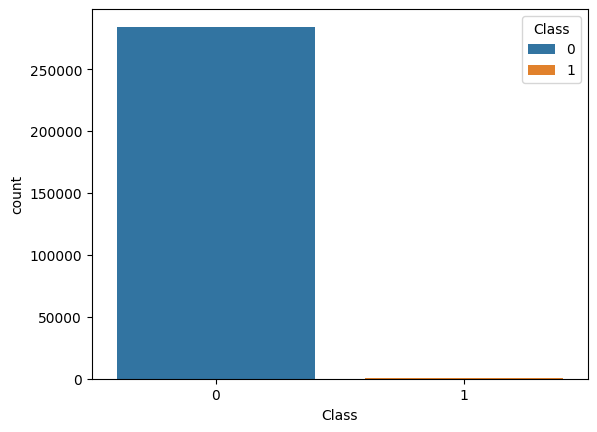

In [464]:
sns.countplot(x="Class", data=df, hue="Class");

In [465]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fuploads.dailydot.com%2F2024%2F07%2Fthat-two-thousand-yard-stare.jpg%3Fq%3D65%26auto%3Dformat%26w%3D1200%26ar%3D2%3A1%26fit%3Dcrop&f=1&nofb=1&ipt=8a203376d8cfb6447646cb871af3f32798daed91c9f4f0ec8457ee1c5c1b3b75" width=30%>

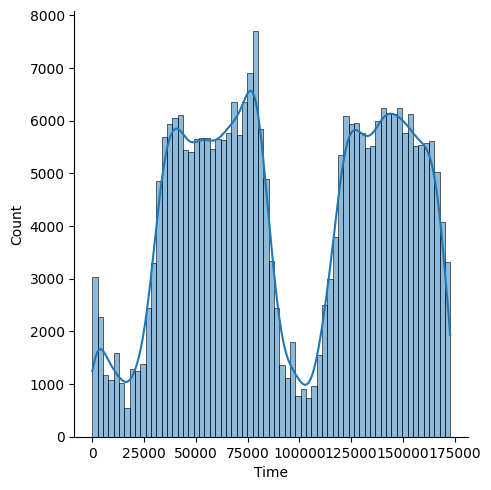

In [466]:
sns.displot(df["Time"], kde=True);

(0.0, 7000.0)

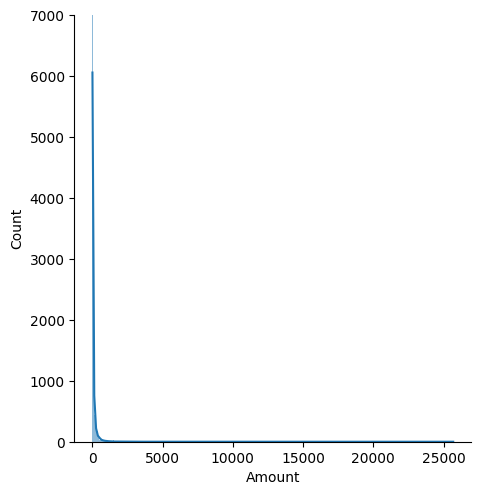

In [467]:
g = sns.displot(df["Amount"], kde=True)
g.ax.set_ylim(0, 7_000)

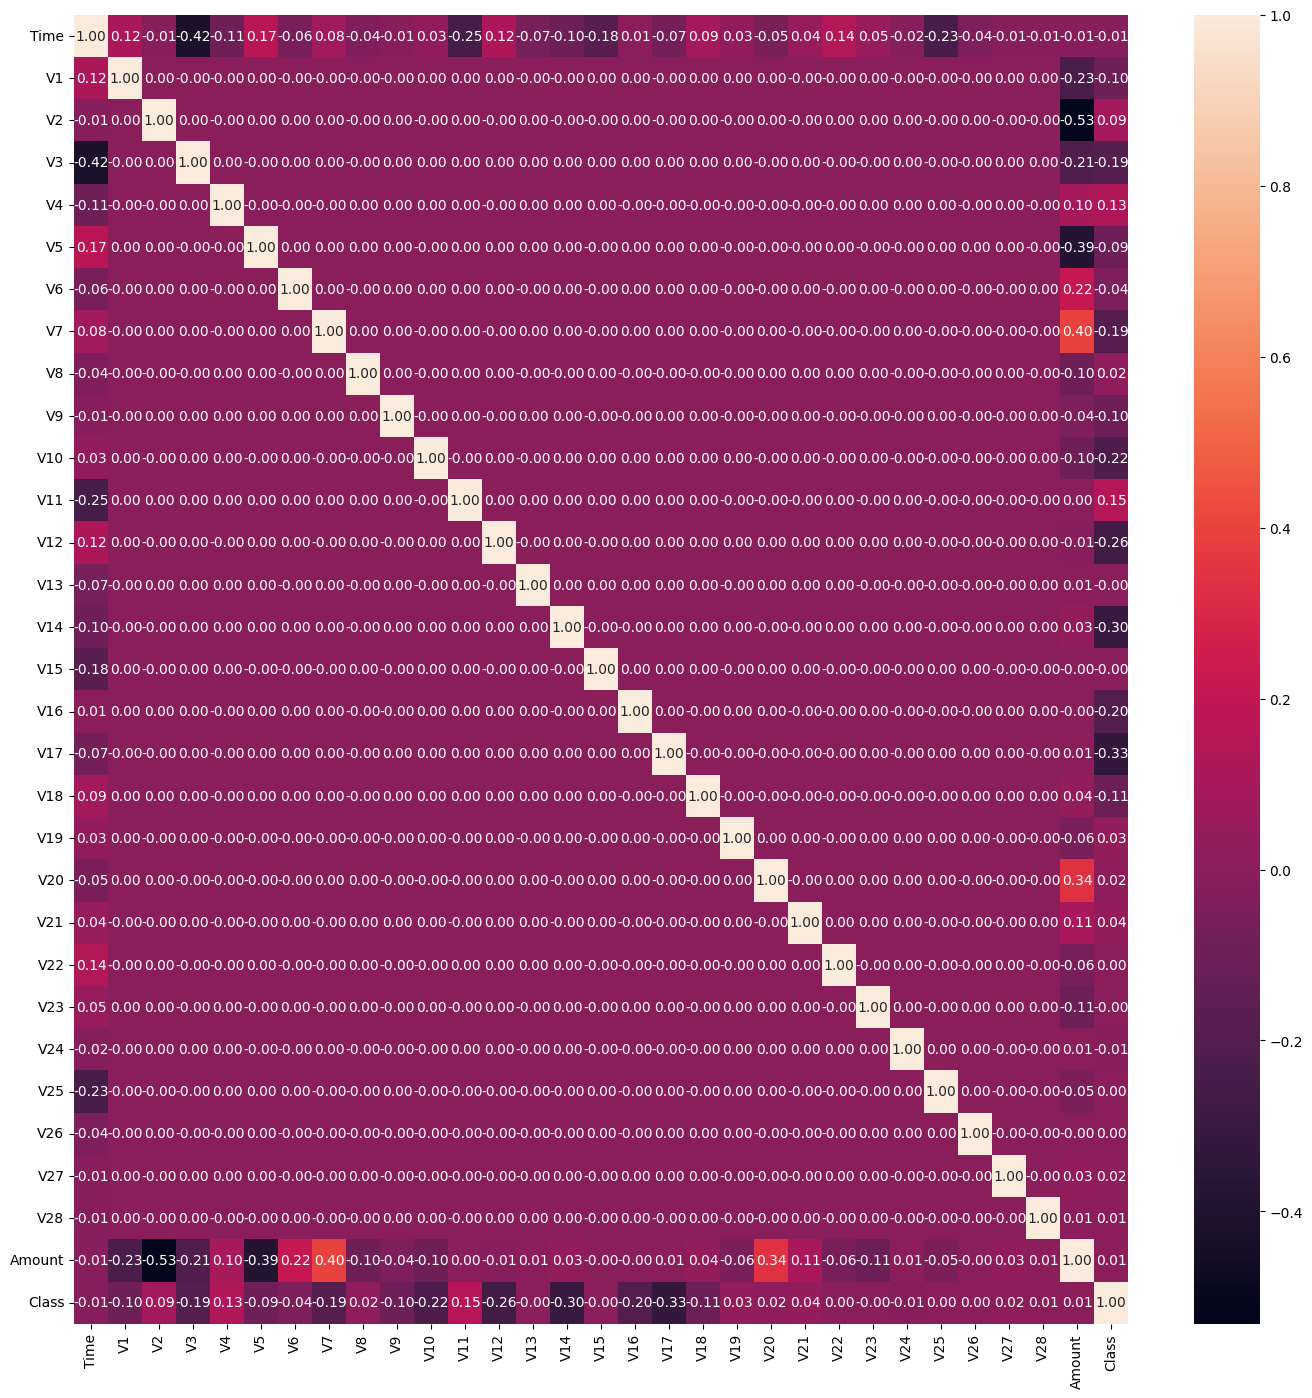

In [468]:
corr_mat = df.corr()

plt.figure(figsize=(17, 17))
sns.heatmap(corr_mat, annot=True, fmt=".2f");

Well... It's kind of hard to tell, because of skewness.<br>
Doesn't really look informative

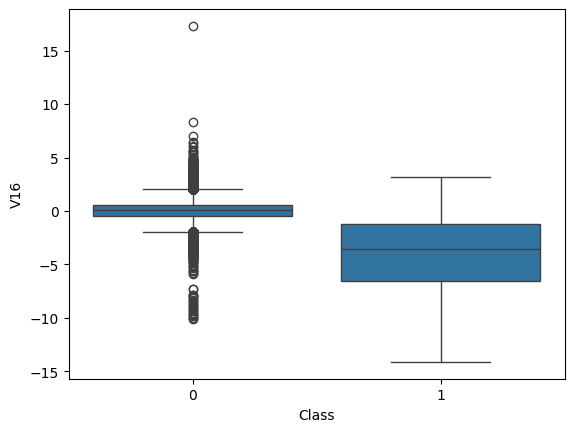

In [469]:
sns.boxplot(data=df, x="Class", y="V16");

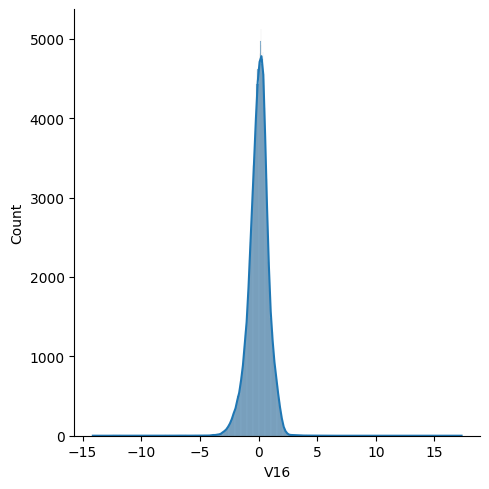

In [470]:
sns.displot(x="V16", data=df, kde=True);

Well, looks like the only trick is data skewness (and 2 unscaled features)<br>
Note: Amount distribution contains outliers, so we should take it into account before scaling

**Preprocessing**

In [471]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler

In [472]:
X, y = df.drop("Class", axis=1), df["Class"]

In [473]:
time_index = list(df).index("Time")
amount_index = list(df).index("Amount")
undersample_strategy = 550
oversample_strategy = 550

scaler = ColumnTransformer(transformers=[
    ("robust", RobustScaler(), [amount_index]),
    ("standard", StandardScaler(), [time_index])
], remainder="passthrough")

pipeline = Pipeline(steps=[
    ("scale", scaler),
    ("undersample", RandomUnderSampler(random_state=42))
])

transformed_X, transformed_y = pipeline.fit_resample(X, y)
transformed_X.shape

(984, 30)

In [474]:
transformed_df = pd.DataFrame(np.concat([transformed_X, np.array(transformed_y).reshape(-1, 1)], axis=1), columns=list(df))
transformed_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.296793,-0.260357,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,-0.325347,-0.216435,0.084204,-1.054631,0.967932,0.601226,0.631117,0.295078,-0.136151,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.0
1,-0.249004,-0.932021,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,0.821998,0.468322,-0.057550,0.573006,0.358688,-0.011633,-0.504570,0.722750,0.861541,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,0.0
2,-0.097813,-0.835765,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,0.575866,-0.594037,1.097880,-0.338340,0.617523,-0.756390,0.535141,1.016704,2.133828,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,0.0
3,0.489066,0.458181,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,-0.841133,-0.586472,-0.779620,-0.436671,0.747871,0.266437,0.703234,0.916719,-0.189967,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,0.0
4,-0.307413,-0.092231,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,1.297531,-1.920966,1.885047,1.323225,-2.044482,1.317655,-0.441076,0.804104,-1.658339,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,5.142178,1.565196,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.0
980,-0.296793,1.569513,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1.0
981,0.780968,1.569597,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1.0
982,3.116048,1.582548,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1.0


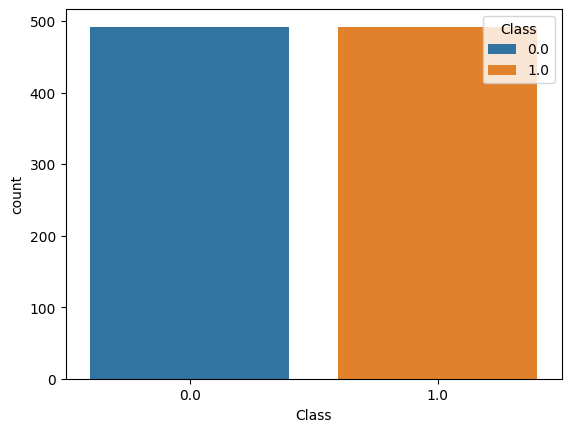

In [475]:
sns.countplot(x="Class", data=transformed_df, hue="Class");

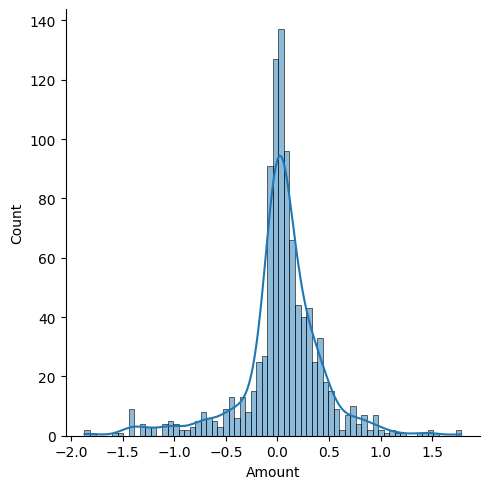

In [476]:
sns.displot(transformed_df["Amount"], kde=True);

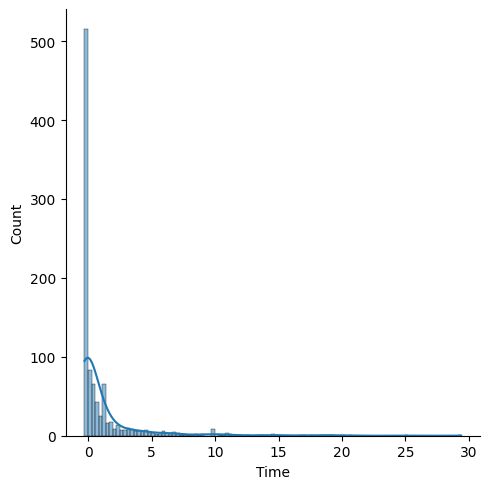

In [477]:
sns.displot(transformed_df["Time"], kde=True);

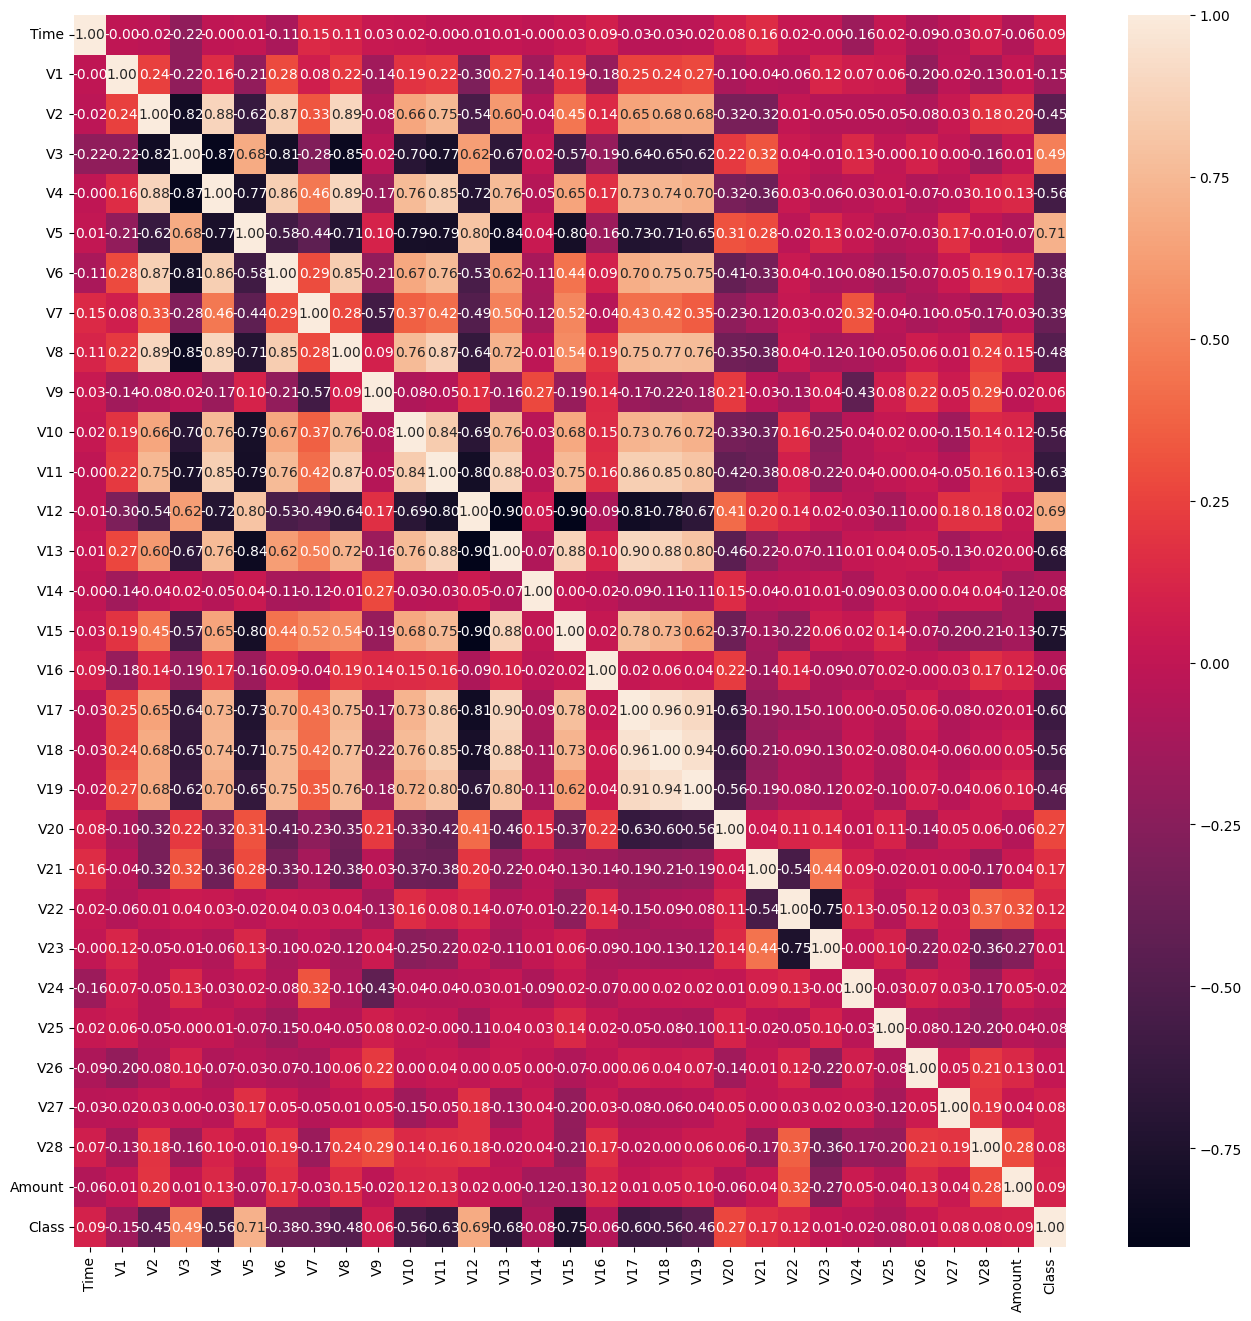

In [478]:
transformed_corr_mat = transformed_df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(transformed_corr_mat, annot=True, fmt=".2f");

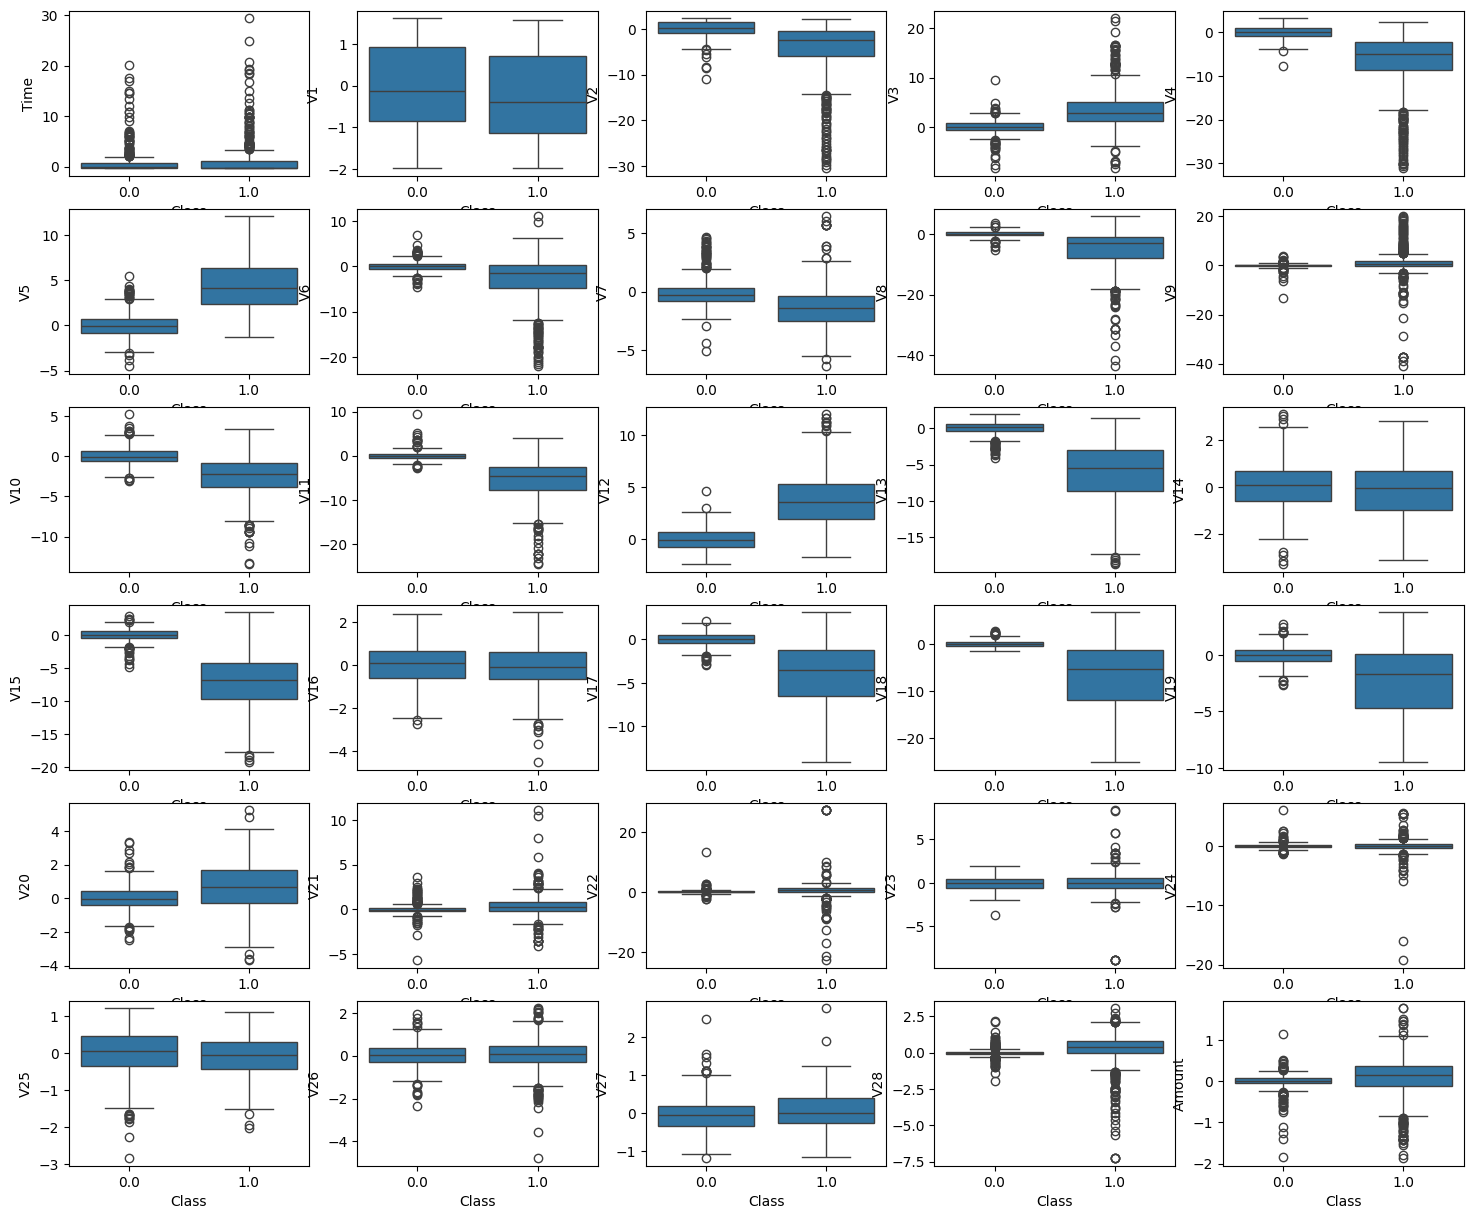

In [479]:
plt.figure(figsize=(18, 15))
for i, feature in enumerate(list(transformed_df)[:-1]):
    plt.subplot(6, 5, i+1)
    sns.boxplot(data=transformed_df, x="Class", y=feature);

In [514]:
X, y = transformed_df.drop("Class", axis=1), transformed_df["Class"]

X.shape, y.shape

((984, 30), (984,))

In [515]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [516]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [517]:
y_pred = log_reg.predict(X)
accuracy_score(y, y_pred)

0.9532520325203252

In [518]:
lg_score = cross_val_score(log_reg, X, y, scoring="accuracy", cv=5)
lg_score

array([0.9035533 , 0.93401015, 0.92893401, 0.94923858, 0.91836735])

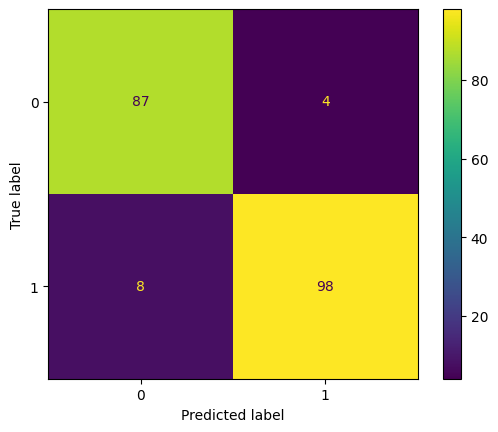

In [519]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)

disp = ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred))
disp.plot();

We highly value recall!

In [520]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [521]:
recall_score(y_val, y_pred), precision_score(y_val, y_pred), f1_score(y_val, y_pred)

(0.9245283018867925, 0.9607843137254902, 0.9423076923076923)

We should pick such threshold, that recall is close to 1

In [522]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [523]:
y_scores = cross_val_predict(log_reg, X, y, cv=3, method="predict_proba")

In [524]:
pos_scores = y_scores[:, 1]

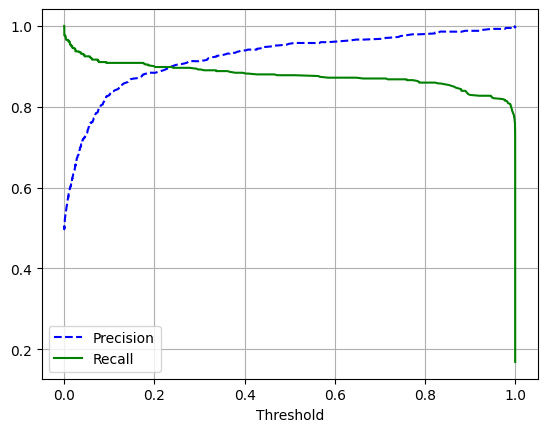

In [525]:
precisions, recalls, thresholds = precision_recall_curve(y, pos_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.grid()
plt.legend()

In [526]:
from sklearn.metrics import roc_curve, roc_auc_score

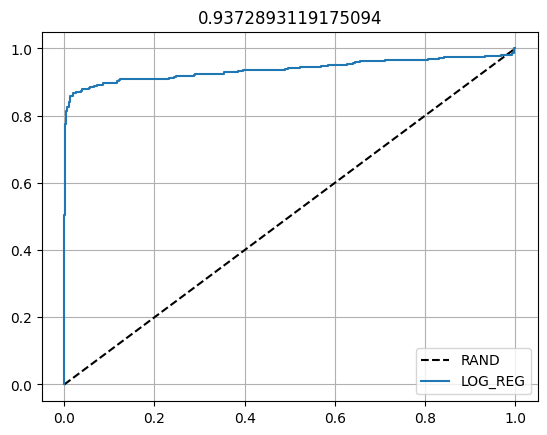

In [527]:
fpr, tpr, thresholds = roc_curve(y, pos_scores)

plt.title(roc_auc_score(y, pos_scores))
plt.plot([0, 1], [0, 1], "k--", label="RAND")
plt.plot(fpr, tpr, label="LOG_REG")
plt.grid()
plt.legend();

Nah... I don't like it

In [594]:
from sklearn.svm import SVC

In [619]:
svc = SVC()
svc.fit(X, y)
y_pred = svc.predict(X)
accuracy_score(y, y_pred)

0.9410569105691057

In [623]:
from sklearn.model_selection import GridSearchCV

In [624]:
param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.6, 0.8, 1.0, 1.2]
}


grid_search = GridSearchCV(svc, param_grid, scoring="accuracy", return_train_score=True, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.6, 0.8, 1.0, 1.2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search.best_score_

np.float64(0.9308764114782969)

In [ ]:
svc = grid_search.best_estimator_

In [627]:
xgb_score = cross_val_score(svc, X, y, scoring="accuracy", cv=5)
xgb_score

array([0.95431472, 0.92893401, 0.9035533 , 0.95431472, 0.91326531])

In [628]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)

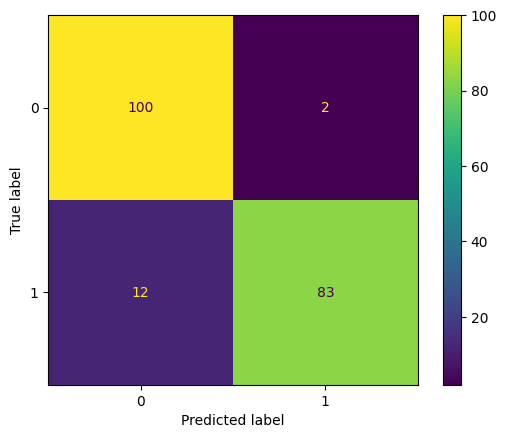

In [629]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred))
disp.plot();

In [630]:
recall_score(y_val, y_pred), precision_score(y_val, y_pred), f1_score(y_val, y_pred)

(0.8736842105263158, 0.9764705882352941, 0.9222222222222223)

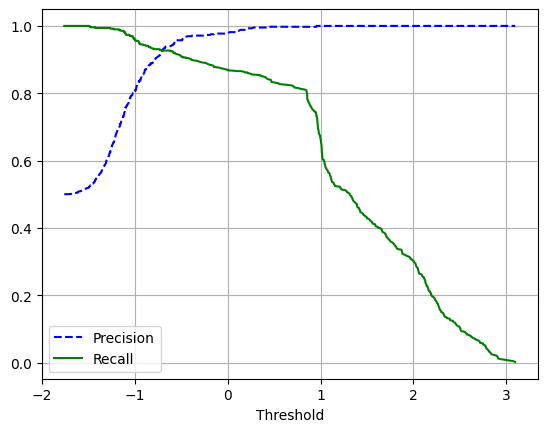

In [631]:
y_scores = cross_val_predict(svc, X, y, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.grid()
plt.legend()

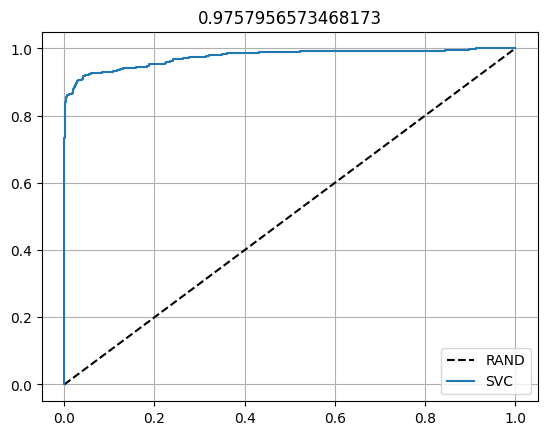

In [632]:
fpr, tpr, thresholds = roc_curve(y, y_scores)

plt.title(roc_auc_score(y, y_scores))
plt.plot([0, 1], [0, 1], "k--", label="RAND")
plt.plot(fpr, tpr, label="SVC")
plt.grid()
plt.legend();

Well... It's better.<br>
Let's do it!

In [633]:
threshold = -1
threshold

-1

In [634]:
y_preds = pos_scores >= threshold

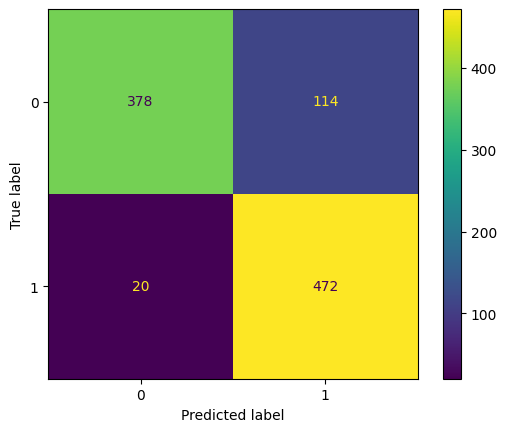

In [635]:
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_preds))
disp.plot();

In [636]:
recall_score(y, y_preds), precision_score(y, y_preds), f1_score(y, y_preds)

(0.959349593495935, 0.8054607508532423, 0.87569573283859)

**Acceptable!**
We could perfrom SMOTE, we could preprocess the data better, but the point was to practice with such dataset.<br>
I think results are pretty good.

In [637]:
df = pd.read_csv("./data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [638]:
X_, y_ = df.drop("Class", axis=1), df["Class"]

In [639]:
X_prep = scaler.transform(X_)

In [640]:
scores = svc.decision_function(X_prep)

c:\Users\rayga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


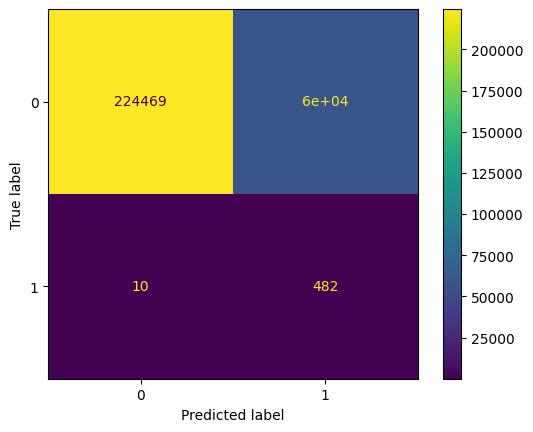

In [641]:
preds = scores >= threshold
disp = ConfusionMatrixDisplay(confusion_matrix(y_, preds))
disp.plot();

In [618]:
X_.shape

(284807, 30)